In [1]:
import torch
import numpy as np
import pandas as pd
from torchvision import datasets
import matplotlib.pyplot as plt
import cv2
from torchvision.transforms import transforms
import os
import shutil
import random
from IPython.display import clear_output
from PIL import Image
from io import BytesIO

In [2]:
def load_color(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.resize(img,(534,451))
       # img = Image.open(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images


In [3]:
def load_depth(folder):
    images = []
    for filename in os.listdir(folder):
        print(filename)
        img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(534,451))
        #img = Image.open(os.path.join(folder,filename))
      #  img = img.resize((534,451))
        x = int(filename[:-4])
        images.append([x,img])
    return images

In [4]:
color_path  = "color_new"
depth_path  = "depth_new"

In [5]:
colorimage = load_color(color_path)
depthimage = load_depth(depth_path)

0000.jpg
0001.jpg
0002.jpg
0003.jpg
0004.jpg
0005.jpg
0006.jpg
0007.jpg
0008.jpg
0009.jpg
0010.jpg
0011.jpg
0012.jpg
0013.jpg
0014.jpg
0015.jpg
0016.jpg
0017.jpg
0018.jpg
0019.jpg
0020.jpg
0021.jpg
0022.jpg
0023.jpg
0024.jpg
0025.jpg
0026.jpg
0027.jpg
0028.jpg
0029.jpg
0030.jpg
0031.jpg
0032.jpg
0033.jpg
0034.jpg
0035.jpg
0036.jpg
0037.jpg
0038.jpg
0039.jpg
0040.jpg
0041.jpg
0042.jpg
0043.jpg
0044.jpg
0045.jpg
0046.jpg
0047.jpg
0048.jpg
0049.jpg
0050.jpg
0051.jpg
0052.jpg
0053.jpg
0054.jpg
0055.jpg
0056.jpg
0057.jpg
0058.jpg
0059.jpg
0060.jpg
0061.jpg
0062.jpg
0063.jpg
0064.jpg
0065.jpg
0066.jpg
0067.jpg
0068.jpg
0069.jpg
0070.jpg
0071.jpg
0072.jpg
0073.jpg
0074.jpg
0075.jpg
0076.jpg
0077.jpg
0078.jpg
0079.jpg
0080.jpg
0081.jpg
0082.jpg
0083.jpg
0084.jpg
0085.jpg
0086.jpg
0087.jpg
0088.jpg
0089.jpg
0090.jpg
0091.jpg
0092.jpg
0093.jpg
0094.jpg
0095.jpg
0096.jpg
0097.jpg
0098.jpg
0099.jpg
0100.jpg
0101.jpg
0102.jpg
0103.jpg
0104.jpg
0105.jpg
0106.jpg
0107.jpg
0108.jpg
0109.jpg
0110.jpg
0

0923.jpg
0924.jpg
0925.jpg
0926.jpg
0927.jpg
0928.jpg
0929.jpg
0930.jpg
0931.jpg
0932.jpg
0933.jpg
0934.jpg
0935.jpg
0936.jpg
0937.jpg
0938.jpg
0939.jpg
0940.jpg
0941.jpg
0942.jpg


In [6]:
print(len(colorimage))
print(len(depthimage))

943
943


In [7]:
"""cv2.imshow("color",colorimage[0])
cv2.waitKey(0); cv2.destroyAllWindows(); cv2.waitKey(1)
cv2.imshow("Depth",depthimage[0][1])
cv2.waitKey(0); cv2.destroyAllWindows(); cv2.waitKey(1)"""

'cv2.imshow("color",colorimage[0])\ncv2.waitKey(0); cv2.destroyAllWindows(); cv2.waitKey(1)\ncv2.imshow("Depth",depthimage[0][1])\ncv2.waitKey(0); cv2.destroyAllWindows(); cv2.waitKey(1)'

In [8]:
fx_d = 391.096
fy_d = 463.098
cx_d = 243.892
cy_d = 208.922
fx_rgb = 1032.6645
fy_rgb = 1033.1741
cx_rgb = 972.3426
cy_rgb = 532.6476
R = [[0.99997,0.00715,-0.00105],[-0.00715,0.99995,0.00662],[0.00110,-0.00661,0.99998]]
#R_ = np.array(R)
T = [[-0.06015],[0.00221],[0.02714]]
#T = [[0],[0],[0]]
#x=534 y=451 depth image resolution
#x=1920 y=1080 color image resolution

In [9]:

fx_rgb= 5.2921508098293293e+02
fy_rgb =5.2556393630057437e+02
cx_rgb= 3.2894272028759258e+02
cy_rgb= 2.6748068171871557e+02
fx_d= 5.9421434211923247e+02
fy_d= 5.9104053696870778e+02
cx_d= 3.3930780975300314e+02
cy_d =2.4273913761751615e+02

In [10]:

def depth(raw_depth):
    if raw_depth<255:
        return 1.0 / ((raw_depth * -0.0030711016) + 3.3309495161)
    return 0

In [11]:
def merge2(imc,imd):
    features=[]
    dep_im = np.asarray(imd)
    col_im = np.asarray(imc)
    for x in range(451):
        cur = []
        for y in range(534):
            d = dep_im[x][y]
            ix = ((x-cx_d)*d)/fx_d
            iy = ((y-cy_d)*d)/fy_d
            iz = d
            vec = [[ix],[iy],[iz]]
            vec = np.array(vec)
            vec = np.dot(R,vec) + T
            x_col = (vec[0]*fx_rgb)/vec[2] + cx_rgb
            y_col = (vec[1]*fy_rgb)/vec[2] + cy_rgb
            x_col = int(x_col)
            y_col = int(y_col)
            if(x_col<0 or y_col<0 or x_col>=1080 or y_col>=1920):
                rgbd = [0,0,0,0]
            else:
                r,g,b = col_im[x_col][y_col]
                rgbd = [r,g,b,d]
            cur.append(rgbd)
        features.append(cur)
    return features

In [12]:
def merge(imc,imd):
    features=[]
    dep_im = np.asarray(imd)
    col_im = np.asarray(imc)
    col  = []
    for x in range(451):
        cur = []
        col2= []
        for y in range(534):
            d = dep_im[x][y]
            ix = ((x-cx_d)*d)/fx_d
            iy = ((y-cy_d)*d)/fy_d
            iz = d
            vec = [[ix],[iy],[iz]]
            vec = np.array(vec)
            vec_ = np.dot(R,vec) + T
            x_col = (vec_[0]*fx_rgb)/vec_[2] + cx_rgb
            y_col = (vec_[1]*fy_rgb)/vec_[2] + cy_rgb
            x_col = int(x_col)
            y_col = int(y_col)
            if(x_col<0 or y_col<0 or x_col>=1080 or y_col>=1920):
                rgbd = [255,255,255,0]
                col2.append([255,255,255])
            else:
                r,g,b = col_im[x_col][y_col]
                rgbd = [r,g,b,d]
                col2.append([r,g,b])
            cur.append(rgbd)
        col.append(col2)
        features.append(cur)
    return col,features

In [13]:
print(depthimage[0][1])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


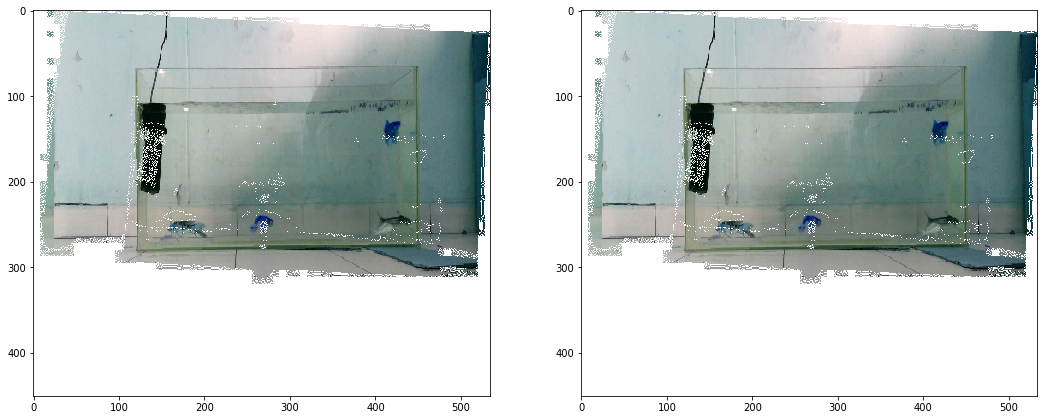

In [14]:
col,features= merge(colorimage[0],depthimage[0][1])
col = np.array(col)
#dep = np.array(dep)
for i in range(1):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))
    ax1.imshow(col)
    ax2.imshow(col)

In [21]:
import pickle

In [ ]:
cnt = 150
for i in range(150,943):
    col,features = merge(colorimage[i],depthimage[i][1])
    print(i)
    x = cnt
    suffix = str(x).zfill(4)
    file = open("C://Users//hp//Desktop//Research_intern_iitd//c2d//{}.txt".format(suffix),"wb+")
    pickle.dump(features,file)
    file.close()
    cnt+=1

150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399


In [23]:
pickle.load(open(r"C://Users//hp//Desktop//Research_intern_iitd//c2d//0000.txt","rb"))

[[[255, 255, 255, 0],
  [255, 255, 255, 0],
  [255, 255, 255, 0],
  [255, 255, 255, 0],
  [255, 255, 255, 0],
  [255, 255, 255, 0],
  [255, 255, 255, 0],
  [255, 255, 255, 0],
  [255, 255, 255, 0],
  [255, 255, 255, 0],
  [255, 255, 255, 0],
  [255, 255, 255, 0],
  [255, 255, 255, 0],
  [255, 255, 255, 0],
  [255, 255, 255, 0],
  [255, 255, 255, 0],
  [80, 128, 126, 15],
  [255, 255, 255, 0],
  [83, 128, 127, 23],
  [255, 255, 255, 0],
  [120, 143, 135, 8],
  [154, 169, 167, 3],
  [117, 144, 141, 18],
  [140, 161, 162, 243],
  [255, 255, 255, 0],
  [194, 207, 207, 15],
  [255, 255, 255, 0],
  [192, 208, 207, 18],
  [192, 207, 208, 1],
  [255, 255, 255, 0],
  [193, 206, 206, 10],
  [255, 255, 255, 0],
  [193, 208, 207, 8],
  [255, 255, 255, 0],
  [192, 207, 209, 5],
  [255, 255, 255, 0],
  [255, 255, 255, 0],
  [255, 255, 255, 0],
  [192, 207, 209, 13],
  [255, 255, 255, 0],
  [255, 255, 255, 0],
  [189, 204, 206, 3],
  [190, 205, 207, 3],
  [255, 255, 255, 0],
  [190, 205, 207, 13],
  

In [ ]:
print(len(col),len(col[0]),len(col[0][0]))

In [ ]:
col.shape

In [ ]:
im = Image.fromarray(np.uint8(col)).convert('RGB')
im.show()